In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA
from scipy.io import savemat
from sklearn.preprocessing import StandardScaler

directory = "../Raws/"

recording_file = directory + "RAW_24-03-2024_Filtrado.csv"
data = pd.read_csv(recording_file)



C:\Users\rodri\AppData\Local\Temp\ipykernel_5400\260381669.py:12: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(recording_file)


BUTTERWORTH LOW PASS FILTTERING

In [2]:
def butter_lowpass_filter(datas) :
    # Definir un filtro, por ejemplo, un filtro pasa baja Butterworth
    order = 6
    fs = 2000  # Frecuencia de muestreo (Hz)
    fc = 50  # Frecuencia de corte (Hz)
    b, a = signal.butter(order, fc / (fs / 2), 'low')

    # Aplicar el filtro a la señal EEG
    return signal.filtfilt(b, a, datas)

In [3]:
def separate_and_filter_columns(df, columns_to_separate):
    separated_df = df[columns_to_separate]
    filtered_df = butter_lowpass_filter(separated_df)
    return filtered_df

In [4]:
def drop_nan_rows(dataset, columns):
    """
    Función para dropear las filas que contienen NaN en ciertas columnas de un dataset.
    
    Parámetros:
    - dataset: DataFrame de pandas.
    - columns: Lista de nombres de columnas en las cuales se verificarán los NaN.
    
    Retorna:
    - DataFrame sin las filas que contienen NaN en las columnas especificadas.
    """
    return dataset.dropna(subset=columns)

APPLY FILTERING TO CUSTOM DATA COLUMNS

C:\Users\rodri\AppData\Local\Temp\ipykernel_5400\947125464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sin_nan[columns_to_filter] =  signal.filtfilt(b, a, data_sin_nan[columns_to_filter])


,time,Subject ID,Take,Date,Age,Gender,ExperienceWithGames,PlayTime,FamiliarizedWithHorrorGames,P8,...,Fright2,Inmersion2,Focus3,Amusement3,Surprise3,Fright3,Inmersion3,Evento1,Evento2,Evento3
852,2.904,4,1,04-03-2024,23,0,0,1,0,-1.702394e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1381,4.712,4,1,04-03-2024,23,0,0,1,0,-1.702438e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,6.648,4,1,04-03-2024,23,0,0,1,0,-1.702398e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2306,7.872,4,1,04-03-2024,23,0,0,1,0,-1.702446e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2363,8.064,4,1,04-03-2024,23,0,0,1,0,-1.702429e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410096,613.852,18,1,20-03-2024,21,0,0,1,1,3.579213e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410213,614.276,18,1,20-03-2024,21,0,0,1,1,3.571977e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410235,614.356,18,1,20-03-2024,21,0,0,1,1,3.571240e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410381,614.876,18,1,20-03-2024,21,0,0,1,1,3.572470e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


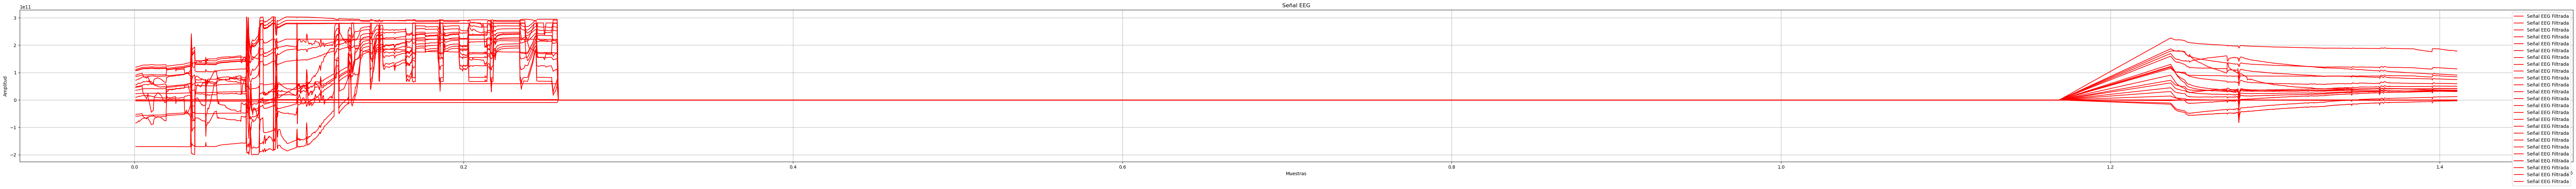

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columnas que deseas separar y filtrar
columns_to_filter = ['P8', 'O2', 'P4','C4','F8','F4','Oz','Cz','Fz','Pz','F3','O1','P7','C3','P3','F7','Accel_x','Accel_y','Accel_z','Digital','Battery','AX','AY','AZ','GX']


# Definir un filtro, por ejemplo, un filtro pasa baja Butterworth
order = 1
fs = 100  # Frecuencia de muestreo (Hz)
fc = 30  # Frecuencia de corte (Hz)
b, a = signal.butter(order, fc / (fs / 2), 'low')

data_sin_nan = drop_nan_rows(data, columns_to_filter)
# Aplicar el filtro a la señal EEG
data_sin_nan[columns_to_filter] =  signal.filtfilt(b, a, data_sin_nan[columns_to_filter])

display (data_sin_nan)

plt.figure(figsize=(100, 6))
#plt.plot(data[columns_to_filter], color='blue', label='Señal EEG Original')
plt.plot(data_sin_nan[columns_to_filter] , color='red', label='Señal EEG Filtrada')
plt.title('Señal EEG')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




In [6]:
import numpy as np
# Combina la ruta de la carpeta y el nombre del archivo para obtener la ruta completa
file_path = "../Raws/Filtered_All_Dataset.csv"

# Crear el DataFrame a partir del diccionario
finalData = pd.DataFrame(data_sin_nan)

# Exporta el DataFrame a un archivo CSV en la ruta especificada
finalData.to_csv(file_path, index=False)  # Si no deseas guardar el índice del DataFrame, puedes establecer index=False